# Stage 1

Project Title : Customer Lead Prediction for Health Insurance

Domain : E-commerce

Problem statement :
        A health insurance company generates a large number of leads through marketing campaigns but not all leads convert into customers, To optimize their marketing strategy and improve conversion rates, the company wants to identify which leads are most likely to purchase a health insurance policy. The project  goal is to build a machine learning model to predict the probability of lead purchasing a health insurance policy based on demographic and behavioral attributes. This is a binary class classification type of problem, the Logistic regression, Random Forest, Decision tree.

Objective :
        The objective is to build a machine learning model to predict the probability of lead purchasing a health insurance policy based on demographic and behavioral attributes.

Outcome :
         The outcome of this project is whether a lead is likely to buy the insurance policy or not

# Dataset Details:  

Source : Kaggle-Health Insurance lead prediction

Year : 2021

Location : India

# Importing Data Set

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url='https://raw.githubusercontent.com/aswintrader/ML-project/refs/heads/main/Health%20Insurance%20Lead%20Prediction%20Raw%20Data.csv'
data = pd.read_csv(url)
data

ID City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  \
0          1        C3         3213            Rented          Individual   
1          2        C5         1117             Owned               Joint   
2          3        C5         3732             Owned          Individual   
3          4       C24         4378             Owned               Joint   
4          5        C8         2190            Rented          Individual   
...      ...       ...          ...               ...                 ...   
50877  50878        C4          845            Rented          Individual   
50878  50879        C5         4188            Rented          Individual   
50879  50880        C1          442            Rented          Individual   
50880  50881        C1            4             Owned               Joint   
50881  50882        C3         3866            Rented          Individual   

       Upper_Age  Lower_Age Is_Spouse Health Indicator  \
0             36         36        No               X1   
1             75         22        No               X2   
2             32         32        No              NaN   
3             52         48        No               X1   
4             44         44        No               X2   
...          ...        ...       ...              ...   
50877         22         22        No               X3   
50878         27         27        No               X3   
50879         63         63        No               X2   
50880         71         49        No               X2   
50881         24         24        No               X3   

      Holding_Policy_Duration  Holding_Policy_Type  Reco_Policy_Cat  \
0                         14+                  3.0               22   
1                         NaN                  NaN               22   
2                         1.0                  1.0               19   
3                         14+                  3.0               19   
4                         3.0                  1.0               16   
...                       ...                  ...              ...   
50877                     NaN                  NaN               18   
50878                     7.0                  3.0                4   
50879                     14+                  1.0               12   
50880                     2.0                  2.0               16   
50881                     2.0                  3.0               18   

       Reco_Policy_Premium  Response  
0                  11628.0         0  
1                  30510.0         0  
2                   7450.0         1  
3                  17780.0         0  
4                  10404.0         0  
...                    ...       ...  
50877               7704.0         0  
50878               5408.0         0  
50879              11374.0         0  
50880              28179.2         1  
50881              11424.0         0  

[50882 rows x 14 columns]

# Initial EDA

1.ID :A unique identifier for each lead record.

2.City_Code	: Represent the city where the lead is located.

3.Region_Code : represent  broader geographic region

4.Accomodation_Type :	Type of residence of the lead (Rented, Owned).

5.Reco_Insurance_Type	: Type of insurance policy recommended to the lead

6.Upper_Age	: Upper limit of the age range for the person covered in the policy.

7.Lower_Age :	Lower limit of the age range.

8.Is_Spouse	:  If the spouse is included in the insurance recommendation.

9.Health Indicator : Categorical value indicating overall health status

10.Holding_Policy_Duration : Duration the lead has been holding policy

11.Holding_Policy_Type : Type of policy the lead  holds

12.Reco_Policy_Cat : Category of the recommended policy

13.Reco_Policy_Premium : Suggested premium amount for the recommended policy.

14.Response : Target variable, indicating whether the lead responded positively

Target variable : Response

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [ ]:
#Discribing the data set to check the distribution of the features
data.describe()

ID   Region_Code     Upper_Age     Lower_Age  \
count  50882.000000  50882.000000  50882.000000  50882.000000   
mean   25441.500000   1732.788707     44.856275     42.738866   
std    14688.512535   1424.081652     17.310271     17.319375   
min        1.000000      1.000000     18.000000     16.000000   
25%    12721.250000    523.000000     28.000000     27.000000   
50%    25441.500000   1391.000000     44.000000     40.000000   
75%    38161.750000   2667.000000     59.000000     57.000000   
max    50882.000000   6194.000000     75.000000     75.000000   

       Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium      Response  
count         30631.000000     50882.000000         50882.000000  50882.000000  
mean              2.439228        15.115188         14183.950069      0.239947  
std               1.025923         6.340663          6590.074873      0.427055  
min               1.000000         1.000000          2280.000000      0.000000  
25%               1.000000        12.000000          9248.000000      0.000000  
50%               3.000000        17.000000         13178.000000      0.000000  
75%               3.000000        20.000000         18096.000000      0.000000  
max               4.000000        22.000000         43350.400000      1.000000

In [ ]:
#Checking for missing values in the data set
data.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

# Stage 2

# EDA (Visualization) and Pre-processingEDA

# Handling Missing values

In [ ]:
#Handling missing values in the health Indicator by imputing the mode of Health Indicator
unique_values = data['Health Indicator'].unique()
unique_values

array(['X1', 'X2', nan, 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'],
      dtype=object)

In [ ]:
mode_Health_indicator = data['Health Indicator'].mode()
mode_Health_indicator

0    X1
Name: Health Indicator, dtype: object

In [ ]:
#Imputing the mode of health indicator in the null values

data['Health Indicator'].fillna(data['Health Indicator'].mode()[0], inplace = True)

/tmp/ipython-input-7-1352591759.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Health Indicator'].fillna(data['Health Indicator'].mode()[0], inplace = True)


In [ ]:
data.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator               0
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [ ]:
#Handling missing values in the Holding_Policy_Duration
data['Holding_Policy_Duration'].unique()

array(['14+', nan, '1.0', '3.0', '5.0', '9.0', '14.0', '7.0', '2.0',
       '11.0', '10.0', '8.0', '6.0', '4.0', '13.0', '12.0'], dtype=object)

In [ ]:
#Transformig '14+' to '14.0' in Holding_Policy_Duration
data['Holding_Policy_Duration'].replace(('14+'), ('14.0'),inplace = True)

/tmp/ipython-input-10-1371441264.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Holding_Policy_Duration'].replace(('14+'), ('14.0'),inplace = True)


In [ ]:
data['Holding_Policy_Duration'].astype('float32')

0        14.0
1         NaN
2         1.0
3        14.0
4         3.0
         ... 
50877     NaN
50878     7.0
50879    14.0
50880     2.0
50881     2.0
Name: Holding_Policy_Duration, Length: 50882, dtype: float32

In [ ]:
# Convert 'Holding_Policy_Duration' to numeric
data['Holding_Policy_Duration'] = pd.to_numeric(data['Holding_Policy_Duration'], errors='coerce')

# Calculate the median
data['Holding_Policy_Duration'].median()


5.0

In [ ]:
# imputing missing values in Holding_Policy_Duration by median
data['Holding_Policy_Duration'] = data['Holding_Policy_Duration'].fillna(data['Holding_Policy_Duration'].median())

In [ ]:
data.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator               0
Holding_Policy_Duration        0
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [ ]:
#imputing missing values by mean of Holding_Policy_Type
data['Holding_Policy_Type'].fillna(data['Holding_Policy_Type'].mode()[0],inplace=True)

/tmp/ipython-input-15-2467923789.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Holding_Policy_Type'].fillna(data['Holding_Policy_Type'].mode()[0],inplace=True)


In [ ]:
data.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [ ]:
#Handling duplicate values
data.duplicated().sum()

np.int64(0)

# Handling Outliers

In [ ]:
#checking for outliers using IQR in upper age
QU1=data['Upper_Age'].quantile(0.25)
QU3=data['Upper_Age'].quantile(0.75)
IQR=QU3-QU1
lower_bound=QU1-1.5*IQR
upper_bound=QU3+1.5*IQR

<Axes: ylabel='Upper_Age'>

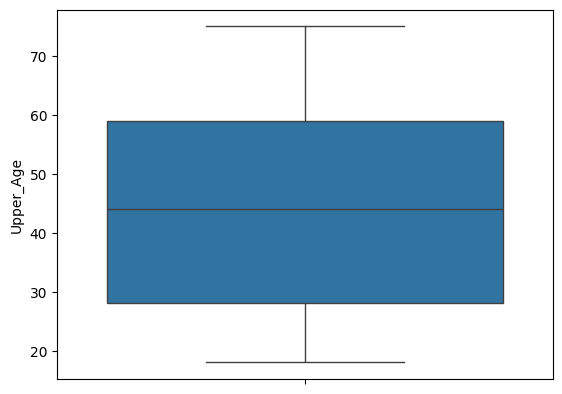

In [ ]:
sns.boxplot(data['Upper_Age'])

In [ ]:
outlierU=data[(data['Upper_Age']<lower_bound) | (data['Upper_Age']>upper_bound)]
outlierU

Empty DataFrame
Columns: [ID, City_Code, Region_Code, Accomodation_Type, Reco_Insurance_Type, Upper_Age, Lower_Age, Is_Spouse, Health Indicator, Holding_Policy_Duration, Holding_Policy_Type, Reco_Policy_Cat, Reco_Policy_Premium, Response]
Index: []

In [ ]:
outlierU.shape #No outliers found

(0, 14)

In [ ]:
#checking for outliers using IQR in Lower age
QU1=data['Lower_Age'].quantile(0.25)
QU3=data['Lower_Age'].quantile(0.75)
IQR=QU3-QU1
lower_bound=QU1-1.5*IQR
upper_bound=QU3+1.5*IQR

<Axes: ylabel='Lower_Age'>

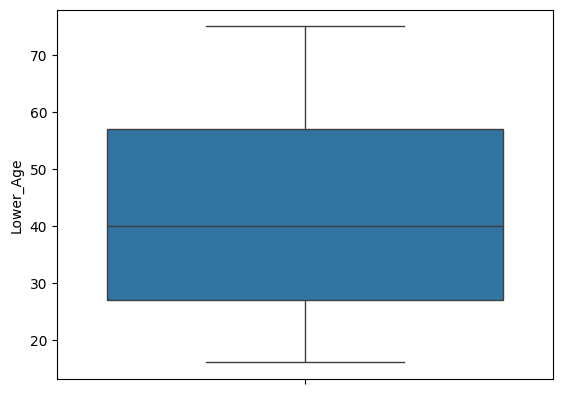

In [ ]:
sns.boxplot(data['Lower_Age'])

In [ ]:
outlierL=data[(data['Lower_Age']<lower_bound) | (data['Lower_Age']>upper_bound)]
outlierL

Empty DataFrame
Columns: [ID, City_Code, Region_Code, Accomodation_Type, Reco_Insurance_Type, Upper_Age, Lower_Age, Is_Spouse, Health Indicator, Holding_Policy_Duration, Holding_Policy_Type, Reco_Policy_Cat, Reco_Policy_Premium, Response]
Index: []

In [ ]:
outlierU.shape #No outliers found

(0, 14)

<Axes: ylabel='Reco_Policy_Premium'>

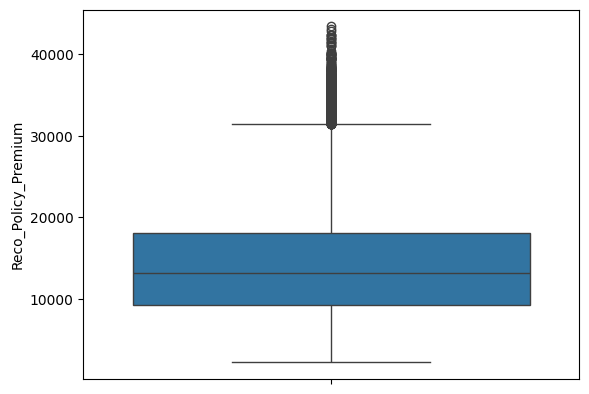

In [ ]:
#checking for outliers using boxplot in Reco_Policy_Premium
sns.boxplot(data['Reco_Policy_Premium'])

In [ ]:
#checking for outliers using IQR in Reco_Policy_Premium
QR1=data['Reco_Policy_Premium'].quantile(0.25)
QR3=data['Reco_Policy_Premium'].quantile(0.75)
IQR=QR3-QR1
lower_bound=QR1-1.5*IQR
upper_bound=QR3+1.5*IQR

In [ ]:
outlierR=data[(data['Reco_Policy_Premium']<lower_bound) | (data['Reco_Policy_Premium']>upper_bound)]

In [ ]:
outlierR.shape

(821, 14)

<Axes: ylabel='Reco_Policy_Premium'>

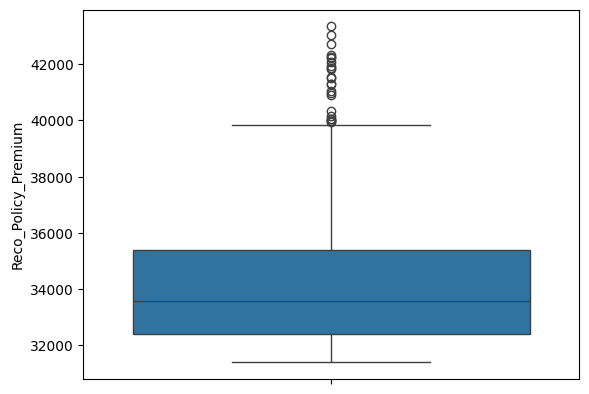

In [ ]:
#after removing outliers
sns.boxplot(outlierR['Reco_Policy_Premium'])

<Axes: xlabel='Reco_Policy_Premium', ylabel='Density'>

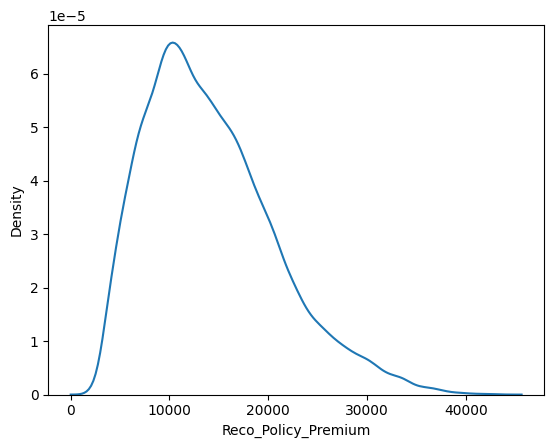

In [ ]:
#Checking for skewness in Reco_Policy_Premium
sns.kdeplot(data['Reco_Policy_Premium'])

In [ ]:
data['Reco_Policy_Premium'].skew()

np.float64(0.7824628894616024)

In [ ]:
#there is a slightly rightskew
#Treating skewness using log method
df=np.log(data['Reco_Policy_Premium'])
df

0         9.361171
1        10.325810
2         8.915969
3         9.785830
4         9.249946
           ...    
50877     8.949495
50878     8.595635
50879     9.339085
50880    10.246339
50881     9.343472
Name: Reco_Policy_Premium, Length: 50882, dtype: float64

<Axes: xlabel='Reco_Policy_Premium', ylabel='Density'>

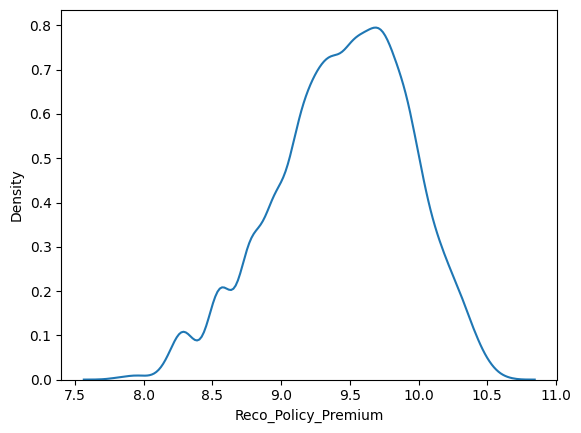

In [ ]:
#After treating skewness
sns.kdeplot(df)

# Visualization

Univariate Analysis

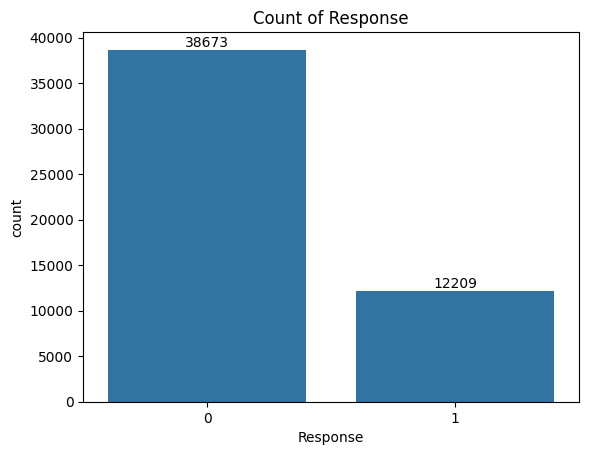

In [ ]:
ax=sns.countplot(data=data, x='Response')
ax.bar_label(ax.containers[0])
plt.title('Count of Response')
plt.show()

In this visualisation x axis is response which shows the count of positive response leads and negative response leads , here the count of positively responded leads is 38673 and negatively responded leads is 12209.

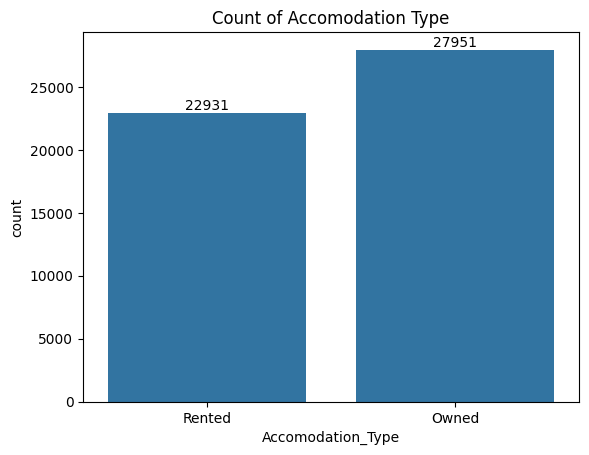

In [ ]:
ax=sns.countplot(data=data, x='Accomodation_Type')
ax.bar_label(ax.containers[0])
plt.title('Count of Accomodation Type')
plt.show()

This visualisation show the count of accomodation type who are rented and owned here the count of rented leads is 22931 and Owned leads is 27951 which is the higher than rented

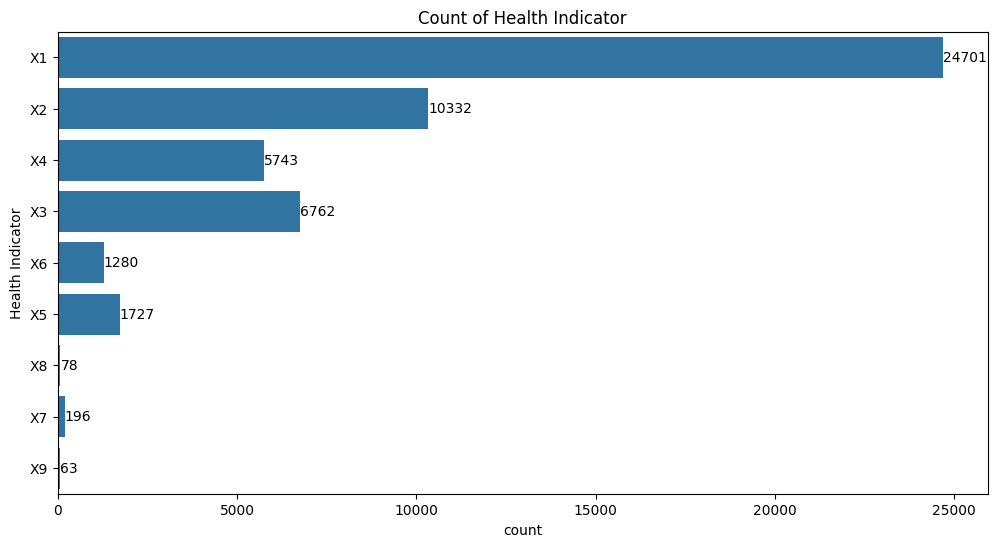

In [ ]:
plt.figure(figsize=(12,6))
ax=sns.countplot(data['Health Indicator'])
ax.bar_label(ax.containers[0])
plt.title('Count of Health Indicator')
plt.show()

This visualisation shows the count of various health indicators here X1, X2, X4, X3 has the highest count of all, X1 has 24701 , X2 has 10332, X3 has 6762

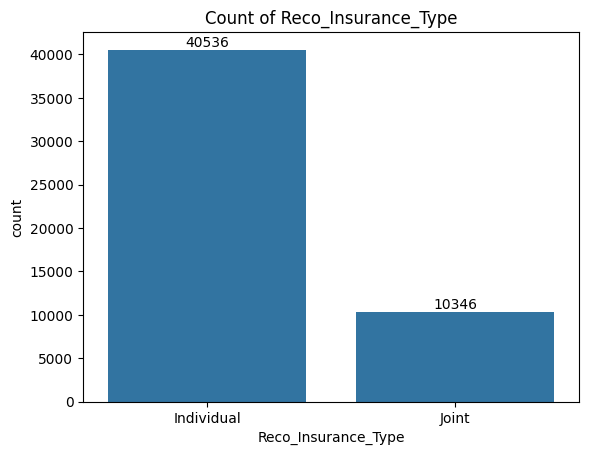

In [ ]:
ax=sns.countplot(data=data, x='Reco_Insurance_Type')
ax.bar_label(ax.containers[0])
plt.title('Count of Reco_Insurance_Type')
plt.show()

This visualisation shows which insurance type is mostly recommended by the leads here individual type of insurance is mostly prefered to the leads

Bi Variate Analysis

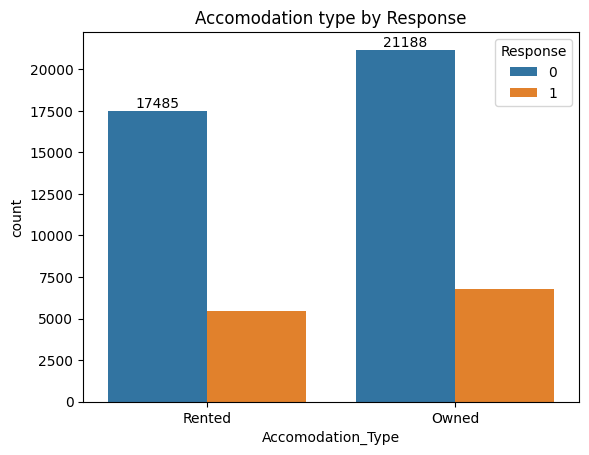

In [ ]:
ax=sns.countplot(data=data, x='Accomodation_Type', hue='Response')
ax.bar_label(ax.containers[0])
plt.title('Accomodation type by Response')
plt.show()

The visualization indicates that a greater number of responses came from individuals who own their accommodation compared to those who rent

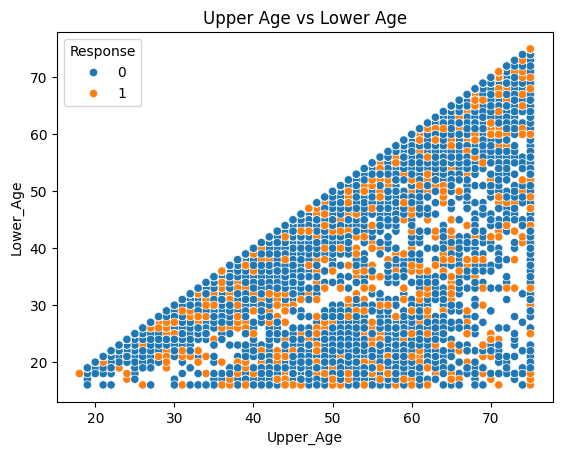

In [ ]:
sns.scatterplot(data=data, x= 'Upper_Age', y='Lower_Age', hue='Response')
plt.title('Upper Age vs Lower Age')
plt.show()

In this visualisation we can see the distribution of Lower age and Upper age to response, x axis indicates  Upper age and y axis indicates lower age this plot indicates that middle aged leads mostly responded positively

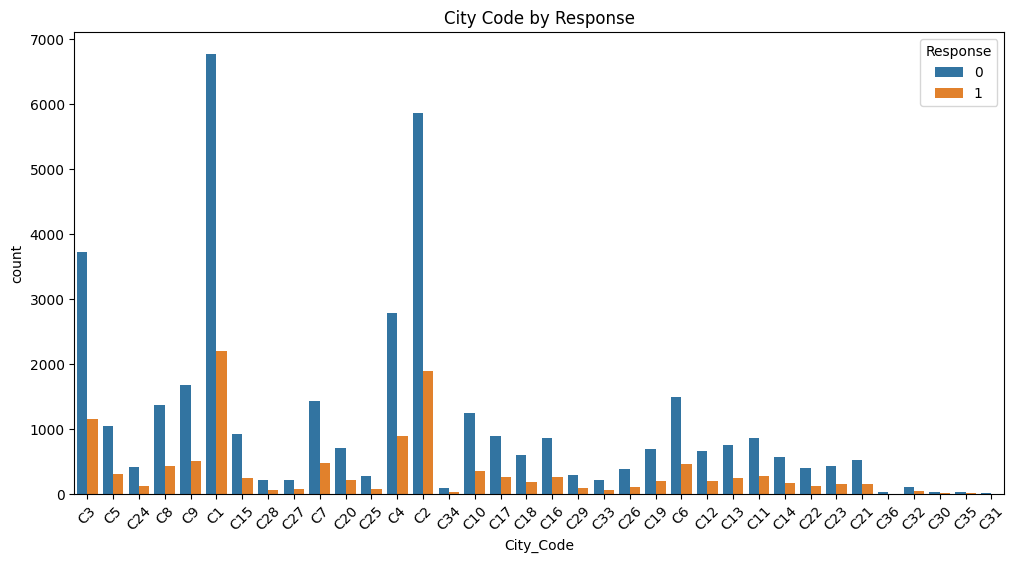

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='City_Code', hue='Response')
plt.title('City Code by Response')
plt.xticks(rotation=45)
plt.show()

In this visualisation x axis is the city code, this plot indicates that most positive response is from the city code C3, C1, C2

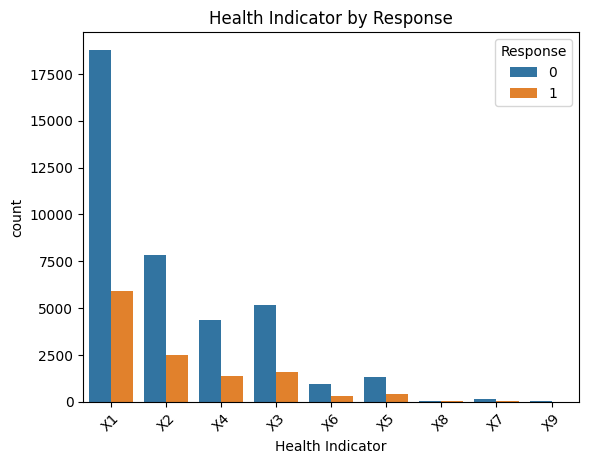

In [ ]:
sns.countplot(data=data, x='Health Indicator', hue= 'Response')
plt.xticks(rotation=45)
plt.title('Health Indicator by Response')
plt.show()

In this visualisation x axis indicates the health indicator the plot shows which health indicator has given most positive response, here the health indicator X1 has the most positive response

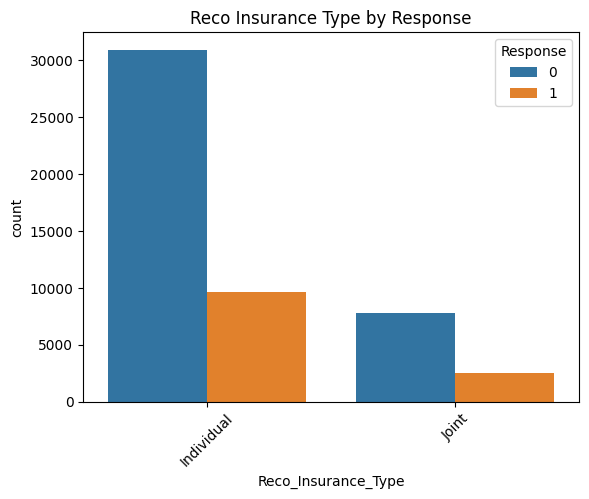

In [ ]:
sns.countplot(data=data, x='Reco_Insurance_Type', hue='Response')
plt.xticks(rotation=45)
plt.title('Reco Insurance Type by Response')
plt.show()

In this visualisation x axis is the Reco_Insurance_type which shows that which type of Insurance is recommended, here the individual type of insurance has the highest positive response than joint type

Multivariate analysis

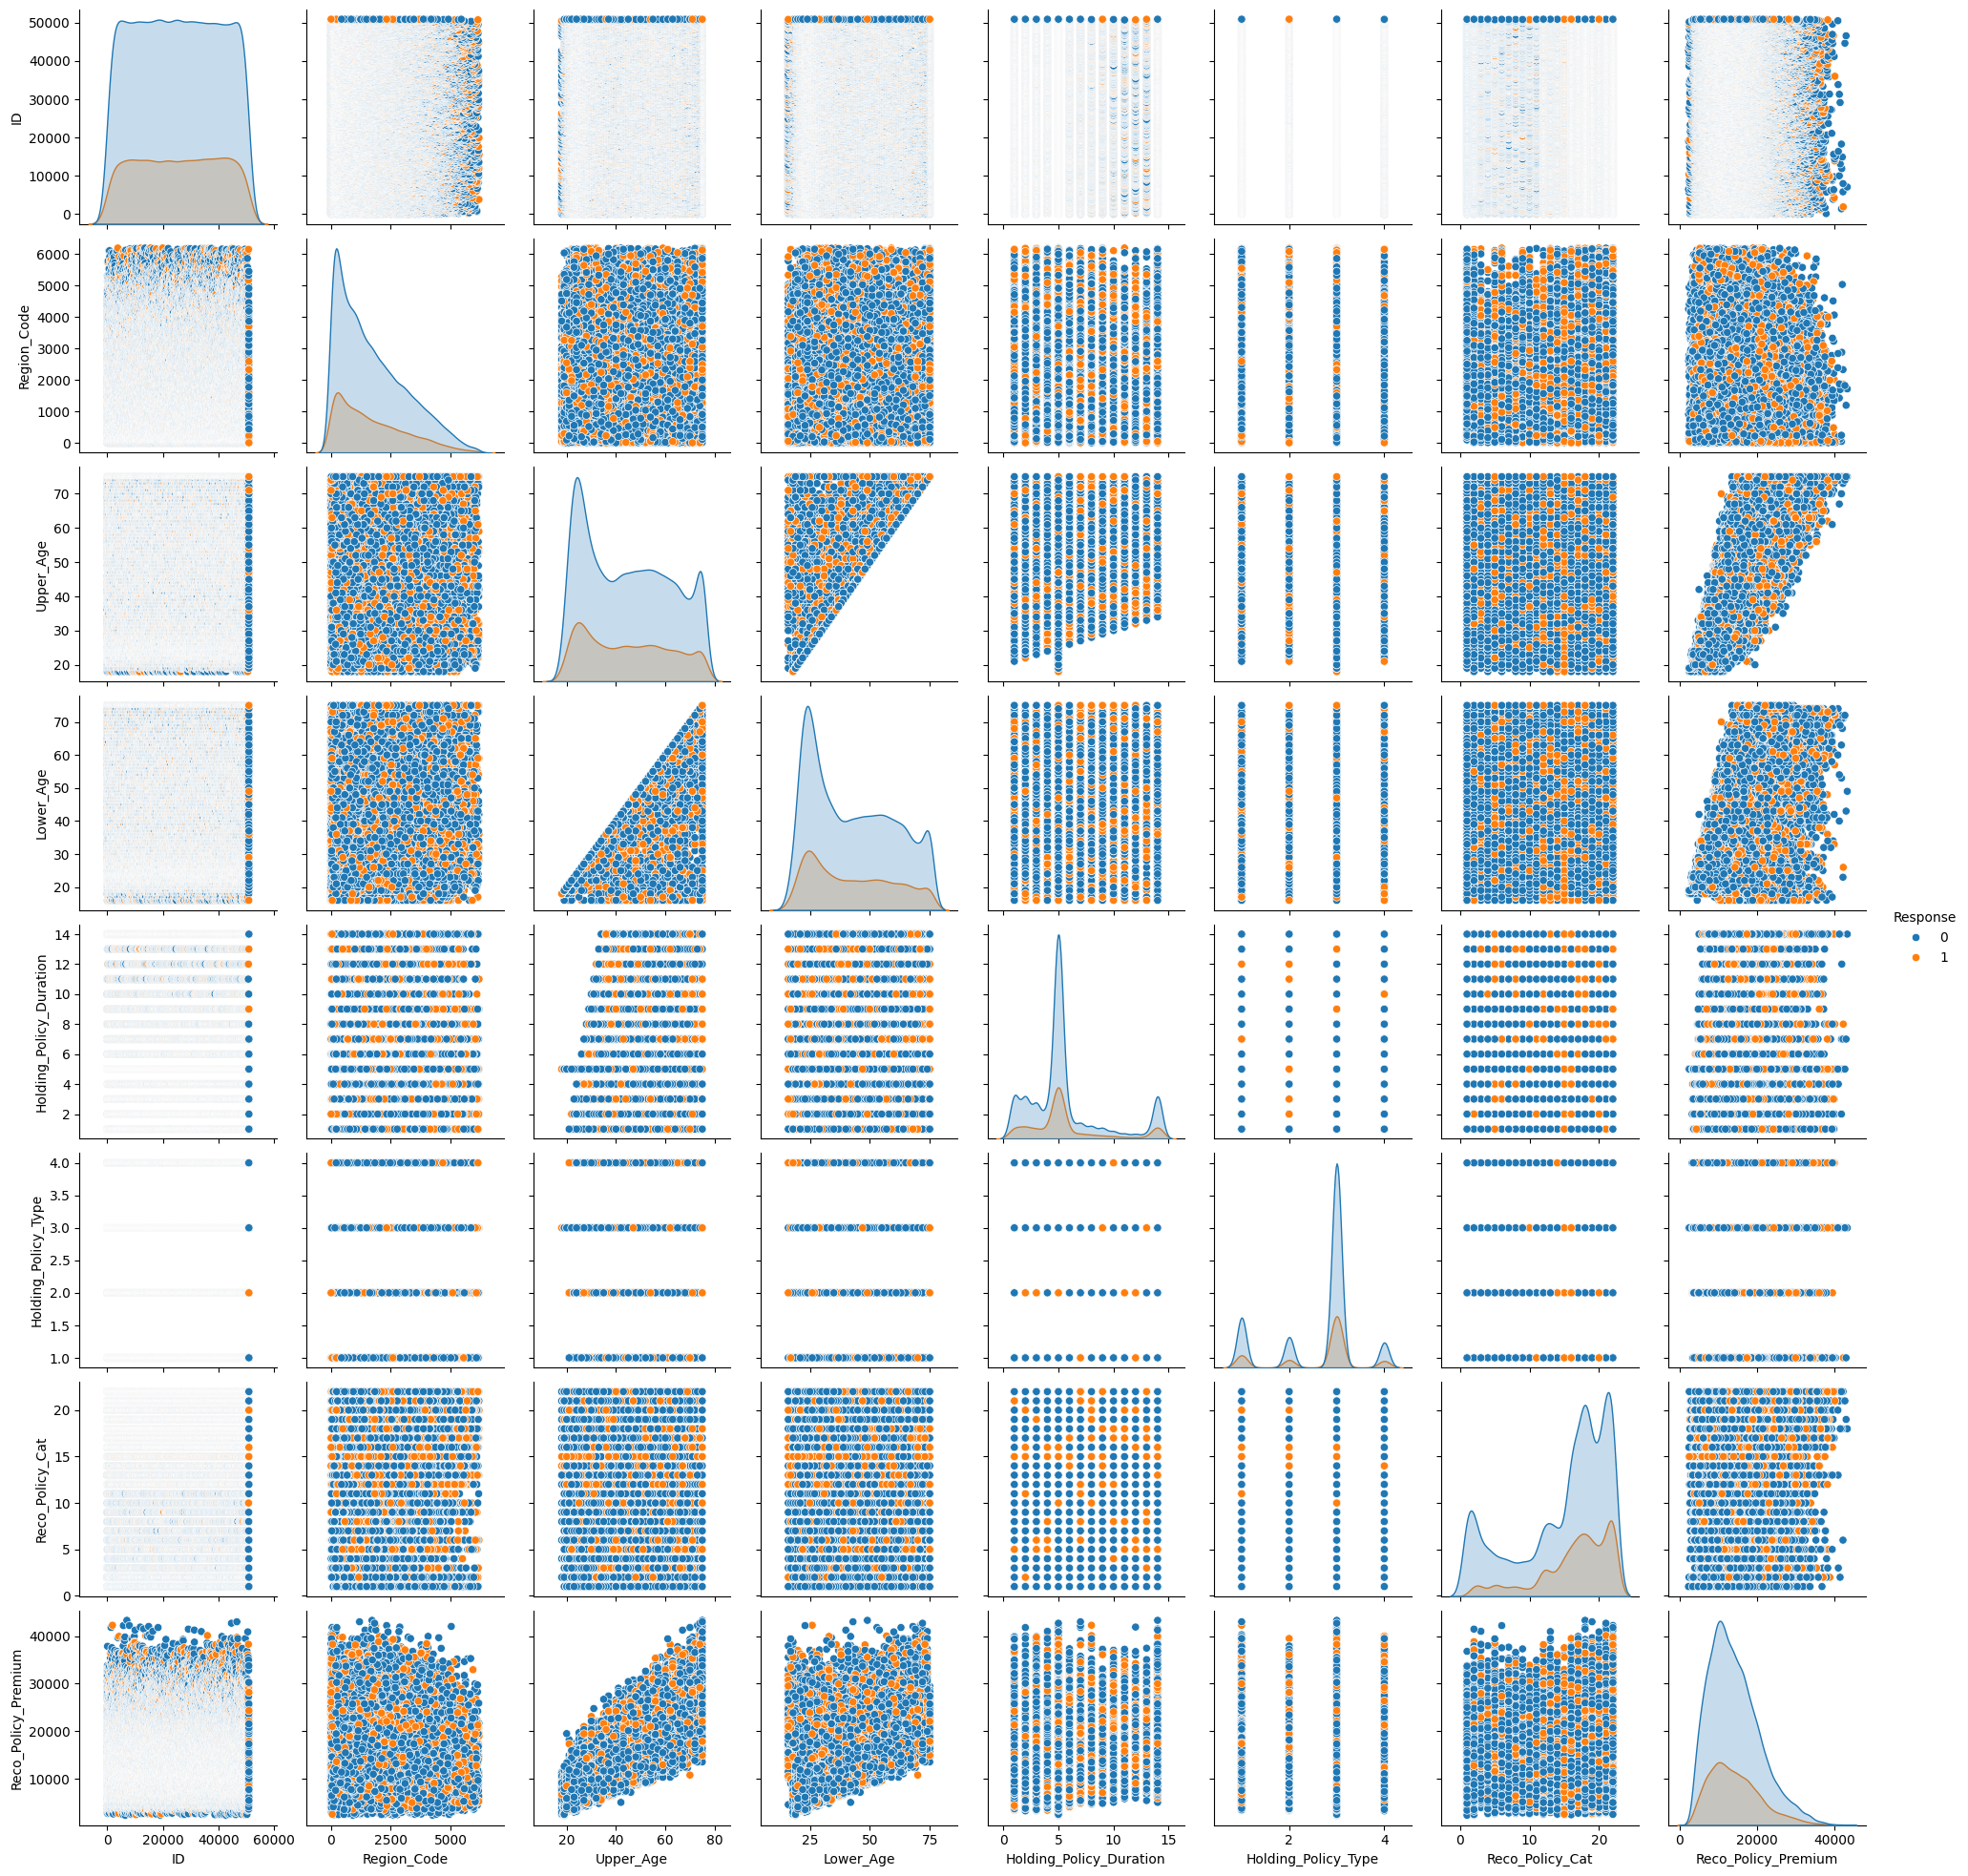

In [ ]:
sns.pairplot(data, hue='Response')
plt.show()


The pair plot shows that customers with higher Holding_Policy_Duration and moderate Reco_Policy_Premium are more likely to respond positively

<Figure size 600x2500 with 0 Axes>

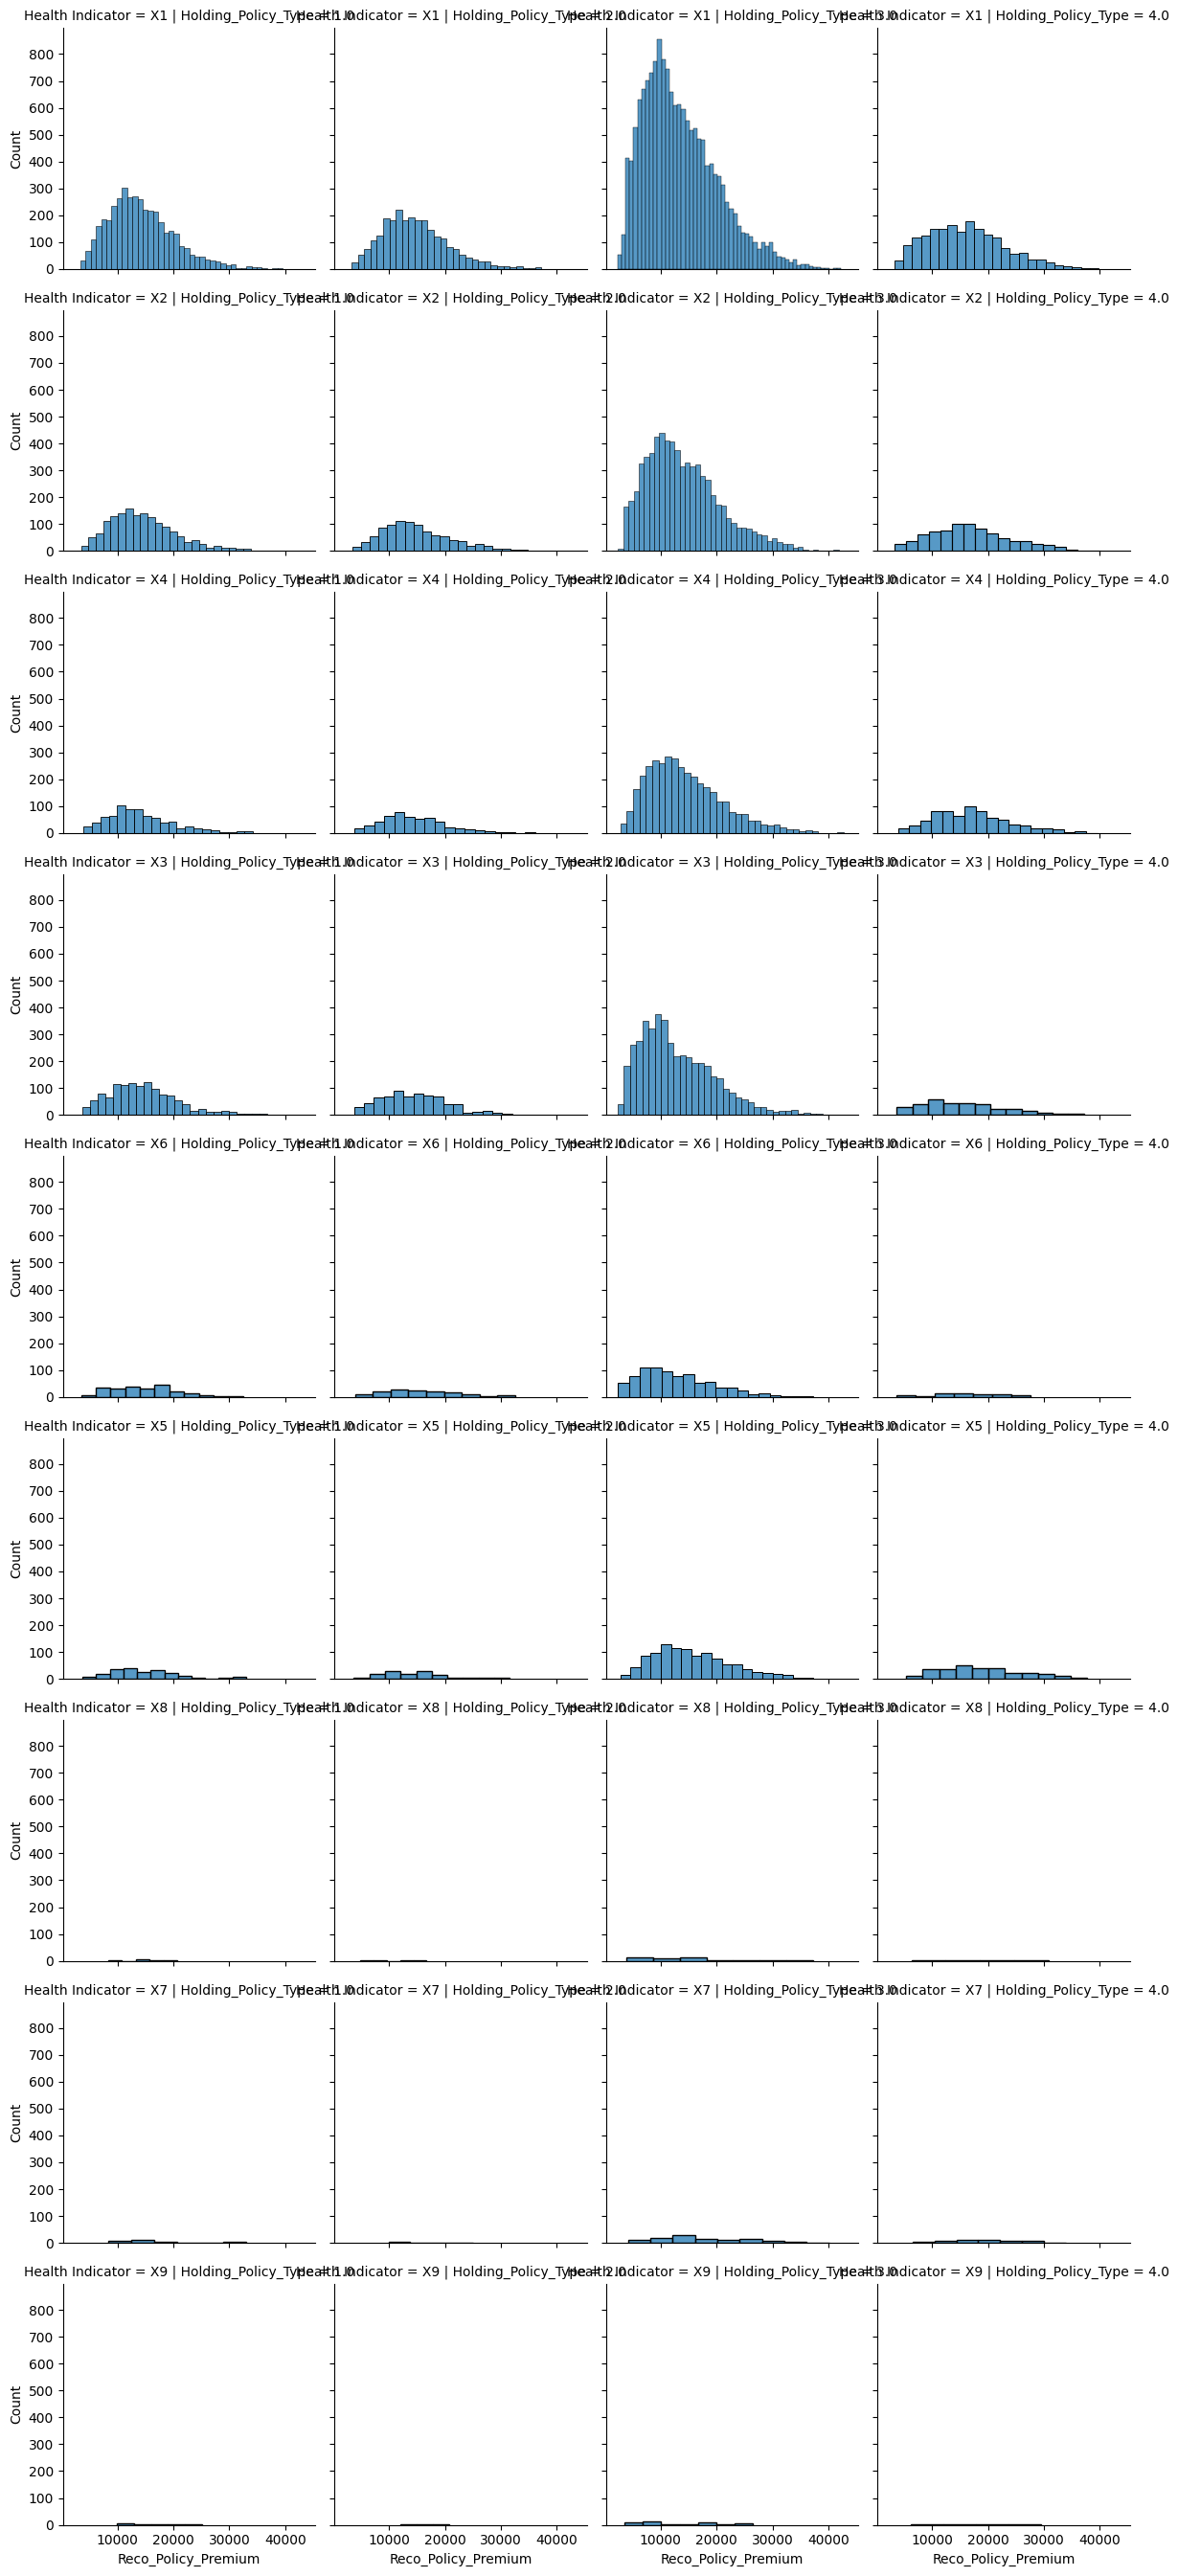

In [ ]:
plt.figure(figsize=(6,25))
fg=sns.FacetGrid(data=data,col='Holding_Policy_Type',row='Health Indicator')
fg.map(sns.histplot,'Reco_Policy_Premium')
plt.show()

In [ ]:
numeric_data = data.select_dtypes(include=["number"])
numeric_data.corr()

ID  Region_Code  Upper_Age  Lower_Age  \
ID                       1.000000    -0.000465  -0.001725   0.001101   
Region_Code             -0.000465     1.000000  -0.005649  -0.005928   
Upper_Age               -0.001725    -0.005649   1.000000   0.921392   
Lower_Age                0.001101    -0.005928   0.921392   1.000000   
Holding_Policy_Duration -0.003557     0.018446   0.290506   0.261744   
Holding_Policy_Type      0.004605     0.009348   0.002579  -0.001842   
Reco_Policy_Cat         -0.002235    -0.065120   0.025257   0.021163   
Reco_Policy_Premium     -0.002350    -0.010797   0.792689   0.615739   
Response                 0.005159     0.001121   0.002772  -0.002099   

                         Holding_Policy_Duration  Holding_Policy_Type  \
ID                                     -0.003557             0.004605   
Region_Code                             0.018446             0.009348   
Upper_Age                               0.290506             0.002579   
Lower_Age                               0.261744            -0.001842   
Holding_Policy_Duration                 1.000000             0.078544   
Holding_Policy_Type                     0.078544             1.000000   
Reco_Policy_Cat                         0.035566             0.053760   
Reco_Policy_Premium                     0.217233             0.012266   
Response                                0.017156             0.006208   

                         Reco_Policy_Cat  Reco_Policy_Premium  Response  
ID                             -0.002235            -0.002350  0.005159  
Region_Code                    -0.065120            -0.010797  0.001121  
Upper_Age                       0.025257             0.792689  0.002772  
Lower_Age                       0.021163             0.615739 -0.002099  
Holding_Policy_Duration         0.035566             0.217233  0.017156  
Holding_Policy_Type             0.053760             0.012266  0.006208  
Reco_Policy_Cat                 1.000000             0.060989  0.114321  
Reco_Policy_Premium             0.060989             1.000000  0.007943  
Response                        0.114321             0.007943  1.000000

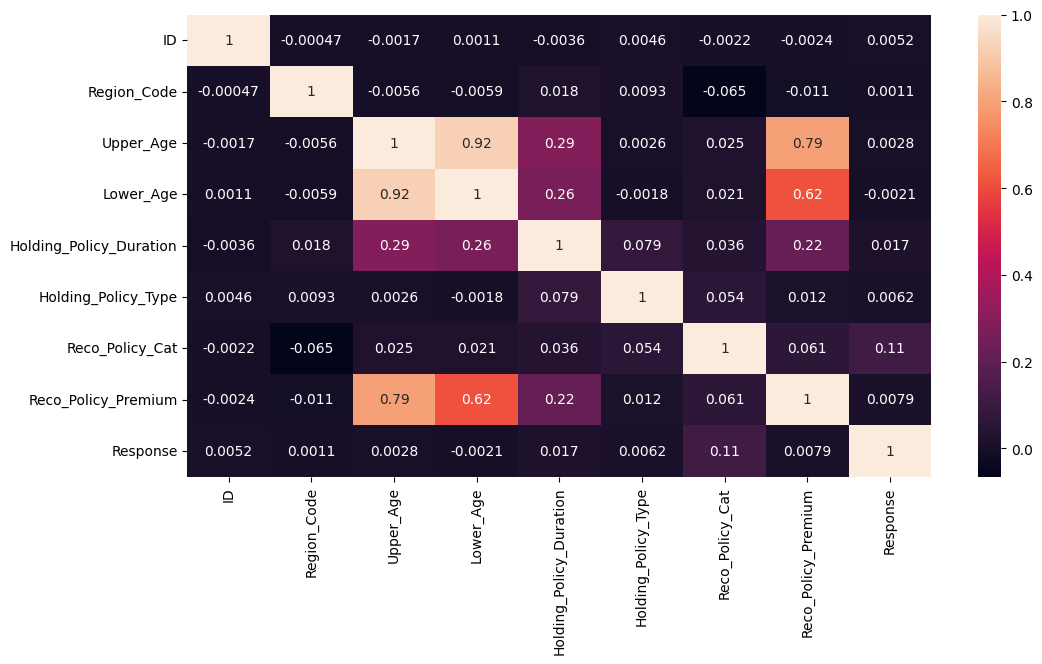

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(numeric_data.corr(),annot=True)
plt.show()

From this visualisation we can see that Upper aged leads are highly correlated with Reco_Policy_Premium, Reco_Policy_Premium and response has high correlation of correlation matrix 0.87, next Reco_Policy_cat and respondse has correlation matrix of 0.62

# Stage 3

# Feature Selection and Model Building

# Feature Engineering

In [ ]:
#Importing required libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [ ]:
#Encoding the categorical datas
categorical_data = data.select_dtypes(include=["object"])
categorical_data

City_Code Accomodation_Type Reco_Insurance_Type Is_Spouse  \
0            C3            Rented          Individual        No   
1            C5             Owned               Joint        No   
2            C5             Owned          Individual        No   
3           C24             Owned               Joint        No   
4            C8            Rented          Individual        No   
...         ...               ...                 ...       ...   
50877        C4            Rented          Individual        No   
50878        C5            Rented          Individual        No   
50879        C1            Rented          Individual        No   
50880        C1             Owned               Joint        No   
50881        C3            Rented          Individual        No   

      Health Indicator  
0                   X1  
1                   X2  
2                   X1  
3                   X1  
4                   X2  
...                ...  
50877               X3  
50878               X3  
50879               X2  
50880               X2  
50881               X3  

[50882 rows x 5 columns]

In [ ]:
categorical_cols = ['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator']

In [ ]:
#LabelEncoding the categorical datas
labelEncoder = LabelEncoder()
for cols in categorical_cols:
   data[cols]= labelEncoder.fit_transform(data[cols])
data.head()

ID  City_Code  Region_Code  Accomodation_Type  Reco_Insurance_Type  \
0   1         22         3213                  1                    0   
1   2         31         1117                  0                    1   
2   3         31         3732                  0                    0   
3   4         16         4378                  0                    1   
4   5         34         2190                  1                    0   

   Upper_Age  Lower_Age  Is_Spouse  Health Indicator  Holding_Policy_Duration  \
0         36         36          0                 0                     14.0   
1         75         22          0                 1                      5.0   
2         32         32          0                 0                      1.0   
3         52         48          0                 0                     14.0   
4         44         44          0                 1                      3.0   

   Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  Response  
0                  3.0               22              11628.0         0  
1                  3.0               22              30510.0         0  
2                  1.0               19               7450.0         1  
3                  3.0               19              17780.0         0  
4                  1.0               16              10404.0         0

# Feature Scaling

In [ ]:
cols=data.columns

In [ ]:
#scaling the features for better prediction using Standardization
Scaler = StandardScaler()
standardized_data= Scaler.fit_transform(data)
standardized_data

array([[-1.73201677,  0.57831877,  1.03942484, ...,  1.08582966,
        -0.38785222, -0.56187035],
       [-1.73194869,  1.31922341, -0.43241534, ...,  1.08582966,
         2.47739376, -0.56187035],
       [-1.73188061,  1.31922341,  1.40387381, ...,  0.61268834,
        -1.02184214,  1.77977001],
       ...,
       [ 1.73188061, -1.23278146, -0.90640968, ..., -0.49130806,
        -0.42639541, -0.56187035],
       [ 1.73194869, -1.23278146, -1.21397933, ...,  0.13954703,
         2.1237069 ,  1.77977001],
       [ 1.73201677,  0.57831877,  1.49797047, ...,  0.45497457,
        -0.41880817, -0.56187035]])

In [ ]:
#Converting back to Data Frame
standardized_data=pd.DataFrame(standardized_data, columns=cols,)
standardized_data

ID  City_Code  Region_Code  Accomodation_Type  \
0     -1.732017   0.578319     1.039425           1.104046   
1     -1.731949   1.319223    -0.432415          -0.905759   
2     -1.731881   1.319223     1.403874          -0.905759   
3     -1.731813   0.084382     1.857504          -0.905759   
4     -1.731744   1.566192     0.321060           1.104046   
...         ...        ...          ...                ...   
50877  1.731744   1.236901    -0.623418           1.104046   
50878  1.731813   1.319223     1.724083           1.104046   
50879  1.731881  -1.232781    -0.906410           1.104046   
50880  1.731949  -1.232781    -1.213979          -0.905759   
50881  1.732017   0.578319     1.497970           1.104046   

       Reco_Insurance_Type  Upper_Age  Lower_Age  Is_Spouse  Health Indicator  \
0                -0.505203  -0.511625  -0.389098  -0.445367         -0.791349   
1                 1.979403   1.741395  -1.197449  -0.445367         -0.080185   
2                -0.505203  -0.742704  -0.620055  -0.445367         -0.791349   
3                 1.979403   0.412691   0.303775  -0.445367         -0.791349   
4                -0.505203  -0.049467   0.072817  -0.445367         -0.080185   
...                    ...        ...        ...        ...               ...   
50877            -0.505203  -1.320401  -1.197449  -0.445367          0.630980   
50878            -0.505203  -1.031552  -0.908752  -0.445367          0.630980   
50879            -0.505203   1.048158   1.169865  -0.445367         -0.080185   
50880             1.979403   1.510316   0.361514  -0.445367         -0.080185   
50881            -0.505203  -1.204862  -1.081970  -0.445367          0.630980   

       Holding_Policy_Duration  Holding_Policy_Type  Reco_Policy_Cat  \
0                     2.377858             0.400939         1.085830   
1                    -0.173242             0.400939         1.085830   
2                    -1.307064            -1.974398         0.612688   
3                     2.377858             0.400939         0.612688   
4                    -0.740153            -1.974398         0.139547   
...                        ...                  ...              ...   
50877                -0.173242             0.400939         0.454975   
50878                 0.393669             0.400939        -1.753018   
50879                 2.377858            -1.974398        -0.491308   
50880                -1.023609            -0.786729         0.139547   
50881                -1.023609             0.400939         0.454975   

       Reco_Policy_Premium  Response  
0                -0.387852  -0.56187  
1                 2.477394  -0.56187  
2                -1.021842   1.77977  
3                 0.545682  -0.56187  
4                -0.573588  -0.56187  
...                    ...       ...  
50877            -0.983299  -0.56187  
50878            -1.331705  -0.56187  
50879            -0.426395  -0.56187  
50880             2.123707   1.77977  
50881            -0.418808  -0.56187  

[50882 rows x 14 columns]

# Feature Selection

In [ ]:
#Selecting the best features using SelectKBest from the standardized features for better prediction
#First droping the unrelevent datas
x= standardized_data.drop(columns=['ID','Response'])
y= data['Response']



In [ ]:
selector= SelectKBest(score_func=f_classif,k=5)
x_new= selector.fit_transform(x,y)
selected_features= x.columns[selector.get_support()]
selected_features

Index(['Reco_Insurance_Type', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium'],
      dtype='object')

<Axes: >

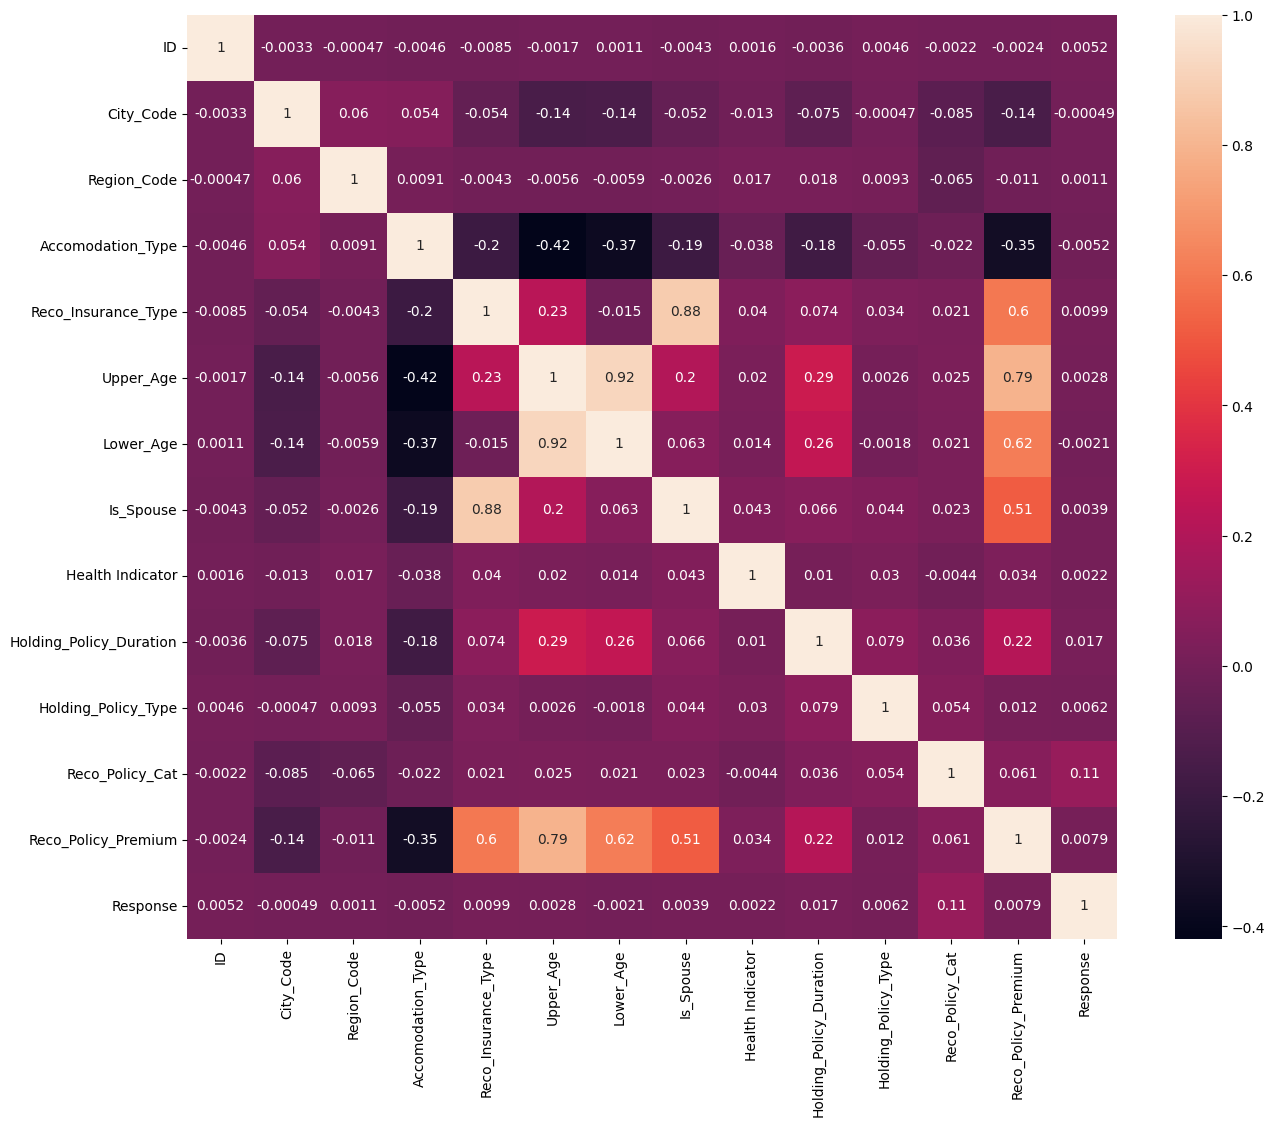

In [ ]:
#ploting the heatmap to find the correlation matrix and confirm the features
plt.figure(figsize=(15,12))
sns.heatmap(standardized_data.corr(), annot= True,)

# Model Building

Train Test Split

In [ ]:
y.value_counts(normalize=42)

Response
0    0.760053
1    0.239947
Name: proportion, dtype: float64

In [ ]:
smote = SMOTE(random_state=0)
X_res, y_res = smote.fit_resample(x_new, y)
X_res.shape

(77346, 5)

In [ ]:
#spliting the dataset
x_train, x_test, y_train, y_test= train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(61876, 5)

In [ ]:
x_test.shape

(15470, 5)

In [ ]:
y_train.shape

(61876,)

In [ ]:
y_test.shape

(15470,)

Model training

In [ ]:
#Importing the required algorithms for model training
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
#Training the data using Logistical Regression
model = LogisticRegression(class_weight='balanced')
model.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
#Make Prediction
y_pred = model.predict(x_test)

In [ ]:
#Evaluvating the model
print('Accuracy_score',accuracy_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print('recall_score',recall_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
print('confusion_matrix',confusion_matrix(y_test,y_pred))


Accuracy_score 0.5380736910148675
precision_score 0.529796511627907
recall_score 0.6610103626943005
f1_score 0.5881742738589212
confusion_matrix [[3221 4529]
 [2617 5103]]


In [ ]:
model2 = RandomForestClassifier(class_weight='balanced',n_estimators = 500, max_depth = 50)
model2.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=50, n_estimators=500)

In [ ]:
y_pred = model2.predict(x_test)

In [ ]:
print('Accuracy_score',accuracy_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print('recall_score',recall_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
print('confusion_matrix',confusion_matrix(y_test,y_pred))


Accuracy_score 0.6983193277310924
precision_score 0.6980153067842781
recall_score 0.697020725388601
f1_score 0.6975176615464386
confusion_matrix [[5422 2328]
 [2339 5381]]


In [ ]:
model3 = DecisionTreeClassifier(class_weight='balanced', max_depth = 30)
model3.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=30)

In [ ]:
y_pred = model3.predict(x_test)

In [ ]:
print('Accuracy_score',accuracy_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print('recall_score',recall_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
print('confusion_matrix',confusion_matrix(y_test,y_pred))


Accuracy_score 0.6779573367808662
precision_score 0.6750639386189259
recall_score 0.6838082901554404
f1_score 0.6794079794079794
confusion_matrix [[5209 2541]
 [2441 5279]]



* RandomForestClassifier performed the best, it scored Accuracy score of 69%



# Stage 4

# Model Evaluation and Comparison

Hyperparameter Tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
models = RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [15, 30, 50],
    'min_samples_split': [ 10, 20, 30]
}

In [ ]:
# Grid Search
grid_search = GridSearchCV(estimator=models, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy',verbose=1)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 300}
Best Accuracy: 0.7043118245384123


In [ ]:

best_m = grid_search.best_estimator_
y_pred = best_m.predict(x_test)
print(" Accuracy after Hyperparameter Tuning:", accuracy_score(y_test, y_pred))
print('precision_score',precision_score(y_test,y_pred))
print('recall_score',recall_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
print('confusion_matrix',confusion_matrix(y_test,y_pred))


 Accuracy after Hyperparameter Tuning: 0.7212669683257918
precision_score 0.7143396226415094
recall_score 0.7356217616580311
f1_score 0.7248245054243778
confusion_matrix [[5479 2271]
 [2041 5679]]


Comparison


LogisticRegression:
  
 - Accuracy score : 53%
 - F1 score       : 58%

RandomForestClassifier:
  
  - Accuracy score : 69%
  - F1 score : 69%

DecisionTreeClassifier:
  
  - Accuracy score : 67%
  - F1 score : 67%


Hyper tuned RandomForestClassifier:
  
  - Accuracy score : 72%
  - F1 score : 72%

Interpretation:

  - Logistic Regression gave about 53% accuracy and 58% F1 score. This means the model is not very good at correctly predicting who will respond to insurance offers.

  - Decision Tree did better with 67% accuracy and 67% F1 score. It predicts better than logistic regression but still makes quite a few mistakes.

  - Random Forest improved more with 69% accuracy and 69% F1 score. This model combines many decision trees to make better predictions.

  - After tuning the Random Forest, accuracy and F1 score increased to 72%. This means the model predicts leads more accurately and reduces wrong predictions.



Conclusion:

  - Logistic Regression is too simple for this problem and not very    
  accurate.

  - Decision Tree is better but can still be improved.

  - Random Forest is the best model

The tuned Random Forest model is the best choice to predict which customers are likely to buy health insurance.